## Kickstarter projects dataset from: https://www.kaggle.com/kemical/kickstarter-projects

In [1]:
import numpy as np
import pandas as pd

In [2]:
kickstarter = pd.read_csv("ks-projects-201801.csv")

In [3]:
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Cleaning in a few clicks

In [4]:
kickstarter_clean = kickstarter.copy()

In [5]:
kickstarter_clean.rename(columns={'main_category' : 'Main Category', 'country' : 'Country', 'state' : 'State (Failed/Successful)'}, inplace=True)

In [6]:
kickstarter_clean.loc[kickstarter_clean['State (Failed/Successful)'] == 'live', 'State (Failed/Successful)'] = 'successful'

In [7]:
kickstarter_clean = kickstarter_clean.loc[kickstarter_clean['State (Failed/Successful)'].isin(['failed', 'successful']),:]

In [8]:
kickstarter_clean['State (Failed/Successful)'].value_counts()

failed        197719
successful    136755
Name: State (Failed/Successful), dtype: int64

### Every value is a visualization object

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

Text(0.5, 1.0, 'Main Category')

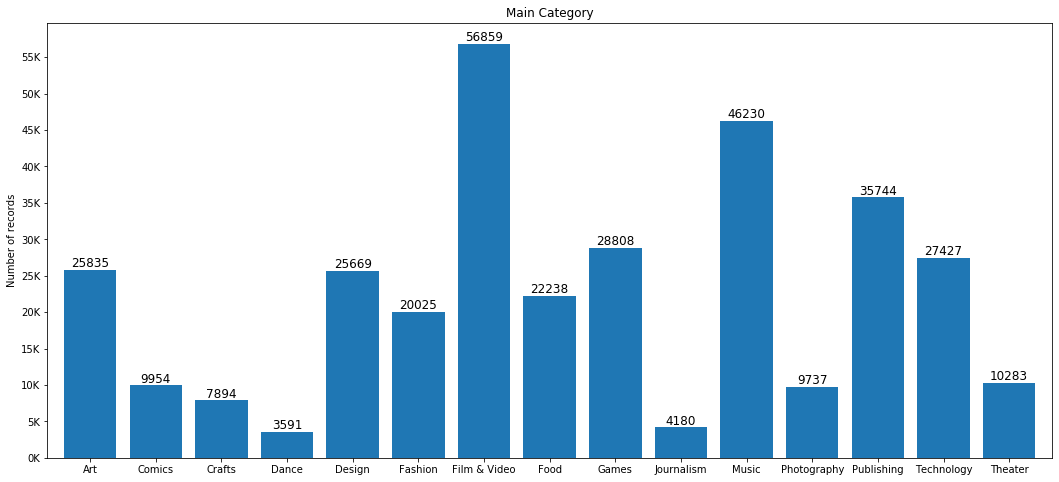

In [11]:
category_sum = kickstarter_clean['Main Category'].value_counts(sort = False).sort_index()
ax = category_sum.plot(kind='bar', width=0.8, figsize=(18, 8))
ax.set_yticks([k for k in np.arange(0, 60000, 5000)])
ax.set_yticklabels([f'{k}K' for k in np.arange(0, 60, 5)])
plt.setp(ax.get_xticklabels(), rotation= 0, ha="center", rotation_mode="anchor")
for x, y in zip([b.xy[0] + b.get_width()/2 for b in ax.patches], category_sum.values):
    ax.text(x, y, str(y), ha='center', va='bottom', size=12)
ax.set_ylabel("Number of records")
ax.set_title('Main Category')

In [12]:
!pip install squarify

In [13]:
import squarify

In [14]:
country_sum = kickstarter_clean.loc[kickstarter_clean['Country'] != 'US', 'Country'].value_counts()

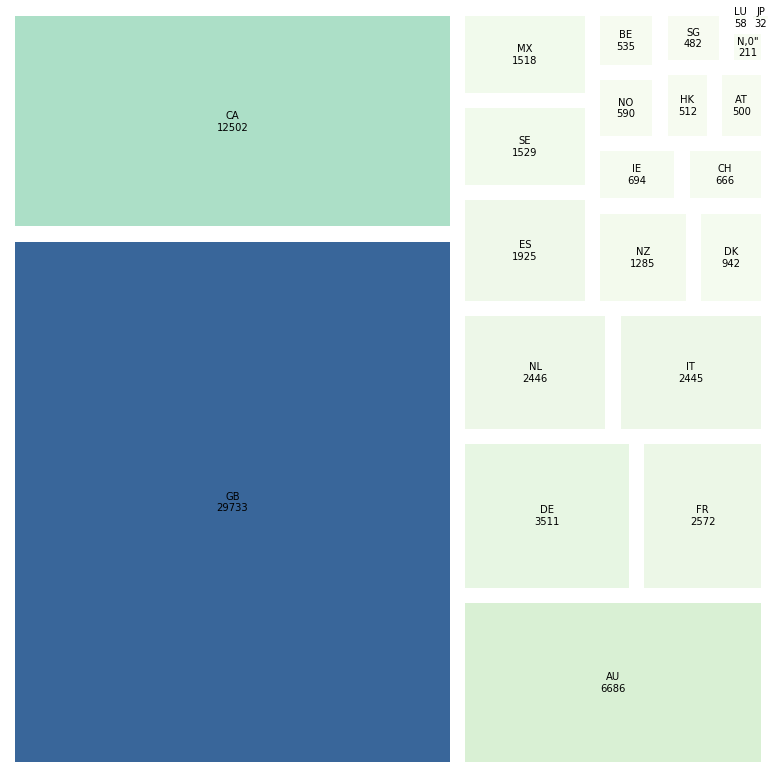

In [15]:
cmap = mpl.cm.GnBu
mini=min(country_sum.values)
maxi=max(country_sum.values)
norm = mpl.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in country_sum.values]

fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, aspect="equal")
labels = [f"{ind}\n{val}" for ind, val in zip(country_sum.index, country_sum.values) ]
squarify.plot(sizes=country_sum.values, label=labels, alpha=.8, color=colors, ax = ax, pad = True )
plt.axis('off')

plt.show()


### Automatic aggregation

In [16]:
cat_state = pd.get_dummies(kickstarter_clean[['State (Failed/Successful)']], prefix="", prefix_sep="")
cat_state['Main Category'] = kickstarter_clean['Main Category']
cat_state_grp = cat_state.groupby('Main Category')
cat_state_rate = cat_state_grp.agg(sum).astype(int)

In [17]:
cat_state_rate

,failed,successful
Main Category,,
Art,14131,11704
Comics,4036,5918
Crafts,5703,2191
Dance,1235,2356
Design,14814,10855
Fashion,14182,5843
Film & Video,32904,23955
Food,15969,6269
Games,16003,12805


Text(0.5, 1.0, 'Main Category / State (Failed / Successful)')

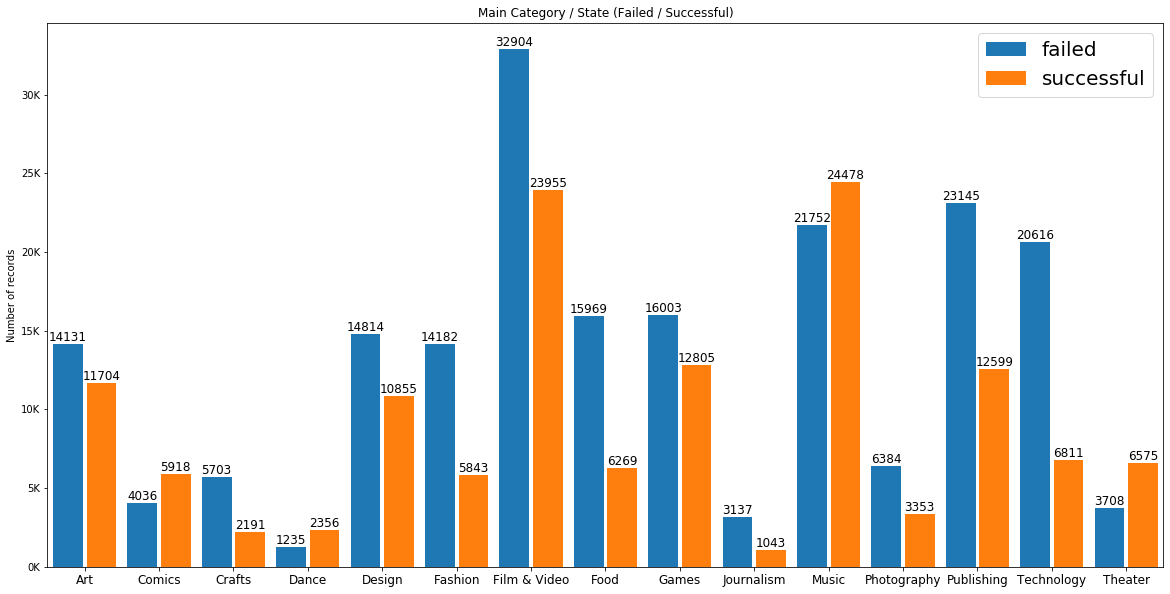

In [18]:
fig2, ax2 = plt.subplots(figsize=(20, 10))
x = np.arange(len(cat_state_rate.index) * 2, step=2)

rects1 = ax2.bar(x - 0.45, cat_state_rate['failed'], 0.8, label='failed')
rects2 = ax2.bar(x + 0.45, cat_state_rate['successful'], 0.8, label='successful')
ax2.set_xlim(-1, x[-1] + 1);

ax2.set_xticks(x)
ax2.set_xticklabels(cat_state_rate.index, fontsize = 12)


ax2.set_yticks(np.arange(0, 35000, 5000))
ax2.set_yticklabels([f'{k}K' for k in np.arange(0, 35, 5)])

plt.setp(ax2.get_xticklabels(), rotation= 0, ha="center", rotation_mode="anchor")

for x, y in zip([b.xy[0] + b.get_width()/2 for b in rects1.patches], cat_state_rate['failed']):
    ax2.text(x, y, str(y), ha='center', va='bottom', size=12)
for x, y in zip([b.xy[0] + b.get_width()/2 for b in rects2.patches], cat_state_rate['successful']):
    ax2.text(x, y, str(y), ha='center', va='bottom', size=12)

ax2.legend(fontsize = 20)
ax2.set_ylabel("Number of records")
ax2.set_title('Main Category / State (Failed / Successful)')

In [19]:
country_state = pd.get_dummies(kickstarter_clean[['State (Failed/Successful)']], prefix="", prefix_sep="")
country_state['Country'] = kickstarter_clean['Country']
country_state_grp = country_state.groupby('Country')
country_state_rate = country_state_grp.agg(sum).astype(int)

In [20]:
country_state_rate['failed'] = np.round(country_state_rate['failed'] / kickstarter_clean['Country'].value_counts(), 3) * 100
country_state_rate['successful'] = np.round(country_state_rate['successful'] / kickstarter_clean['Country'].value_counts(), 3) * 100
country_state_rate

,failed,successful
Country,,
AT,75.6,24.4
AU,68.9,31.1
BE,69.3,30.7
CA,65.9,34.1
CH,69.8,30.2
DE,71.2,28.8
DK,60.1,39.9
ES,71.7,28.3
FR,62.7,37.3


Text(0.5, 1.0, 'Country / State (Failed / Successful)')

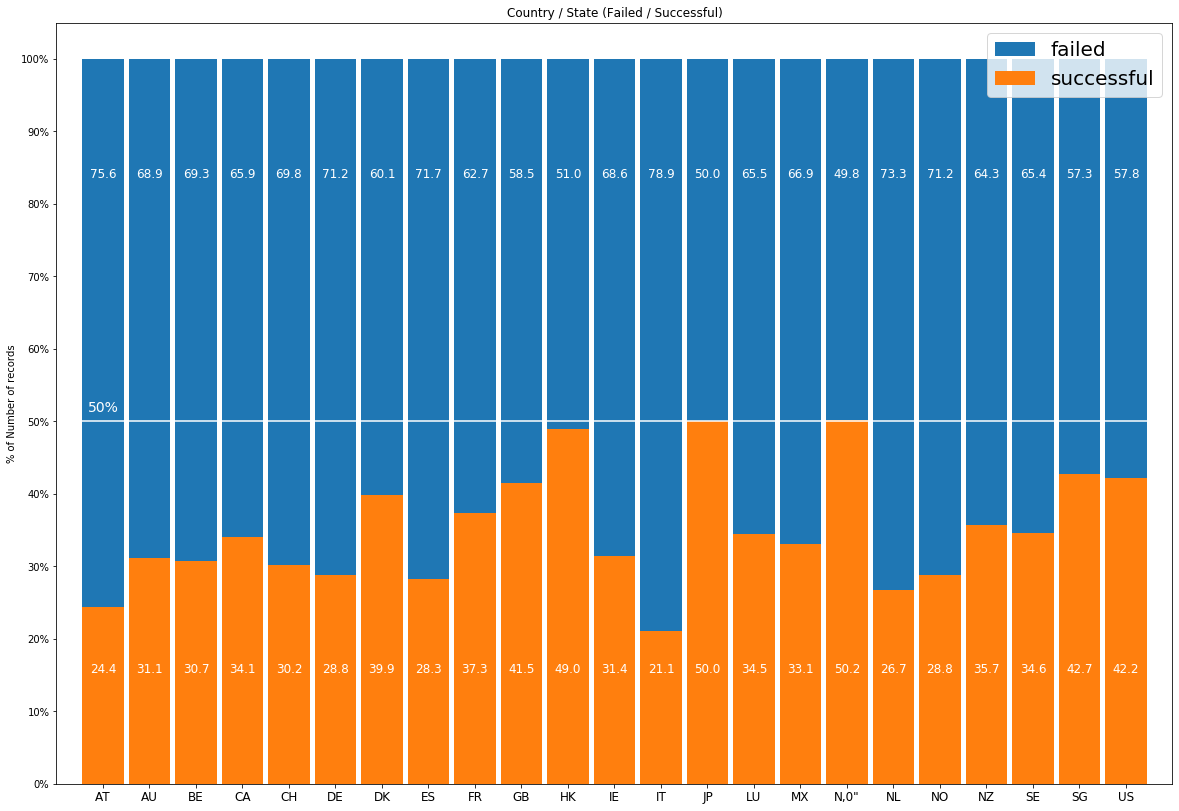

In [57]:
fig3, ax3 = plt.subplots(figsize=(20, 14))
x1 = np.arange(len(country_state_rate.index))

rects1 = ax3.bar(x1, 100, 0.9, label='failed')
rects2 = ax3.bar(x1, country_state_rate['successful'], 0.9, label='successful')
ax3.set_xlim(-1, x1[-1] + 1);

ax3.set_xticks(x1)
ax3.set_xticklabels(country_state_rate.index, fontsize = 12)


ax3.set_yticks(np.arange(0, 110, 10))
ax3.set_yticklabels([f'{k}%' for k in np.arange(0, 110, 10)])

plt.setp(ax3.get_xticklabels(), rotation= 0, ha="center", rotation_mode="anchor")

for x, y in zip(x1, country_state_rate['failed']):
    ax3.text(x, 85, f'{y:.1f}', ha='center', va='top', size=12, color='w')
for x, y in zip(x1, country_state_rate['successful']):
    ax3.text(x, 15, f'{y:.1f}', ha='center', va='bottom', size=12, color='w')
ax3.axhline(50, color='w')
ax3.text(0, 51, '50%', ha='center', va='bottom', size=14, color='w')
ax3.legend(fontsize = 20)
ax3.set_ylabel("% of Number of records")
ax3.set_title('Country / State (Failed / Successful)')

### Map from scratch

In [56]:
import folium

In [137]:
from IPython.display import display

In [106]:
country_loc = pd.DataFrame(kickstarter_clean['Country'].value_counts().index, columns=['Country'])
country_loc['Number'] = kickstarter_clean['Country'].value_counts().values
country_loc.index = country_loc['Country']
country_loc = country_loc.loc[country_loc['Country'] != 'US']

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="user",timeout=10)
geos = [geolocator.geocode(c) for c in country_loc['Country'].values]
country_loc['Location'] = [(location.latitude, location.longitude) for location in geos]


country_loc

,Country,Number,Location
Country,,,
GB,GB,29733,"(55.367000000000004, -3.96141844454237)"
CA,CA,12502,"(61.0666922, -107.9917071)"
AU,AU,6686,"(-24.7761086, 134.755)"
DE,DE,3511,"(51.0834196, 10.4234469)"
FR,FR,2572,"(46.603354, 1.8883335)"
NL,NL,2446,"(52.5001698, 5.7480821)"
IT,IT,2445,"(42.6384261, 12.674297)"
ES,ES,1925,"(39.3262345, -4.8380649)"
SE,SE,1529,"(59.6749712, 14.5208584)"


In [189]:
country_number_map = folium.Map(location=[30, 10], zoom_start=2.2)

import matplotlib.cm as cm
import matplotlib.colors as colors

cmap = mpl.cm.autumn
mini=min(country_loc['Number'])
maxi=max(country_loc['Number'])
norm = mpl.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in country_loc['Number']]


for (lat, lng), cnum, cc, cl in zip(country_loc['Location'], country_loc['Number'], country_loc['Country'], colors):
    label = folium.Popup(f'{cc}<br>{cnum}')
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup= label,
        color = mpl.colors.rgb2hex(cl[:3]),
        fill=True,
        fill_color=mpl.colors.rgb2hex(cl[:3]),
        fill_opacity=0.7,
        parse_html=False).add_to(country_number_map)

In [190]:
display(country_number_map)